In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from gc import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
import MyLibrary as ml
import tensorflow as tf
from tensorflow.keras import layers, models
import json
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
#from tensorflow.keras.models import model_from_json,model_from_config
from tensorflow.keras.utils import plot_model
from pathlib import Path
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from time import strftime
import random
from tensorflow.keras.callbacks import EarlyStopping
print("Tensorflow version: ",tf.__version__)

2024-06-17 13:19:22.381972: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 13:19:22.385181: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-17 13:19:23.316310: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Tensorflow version:  2.16.1


In [2]:
ds=ml.dataFrame.RenameColumns(ml.pathDataSet)
dfs=ml.dataFrame.SensoriDataSet(ml.pathsensoriDataSet)
ds_filtered = ml.FilterDataFrame(ds, ['X Sensore', 'Velocità', 'Angolo'], [[884], [0.83], [0.0]])
array = ds['Pressione'].unique()
#ds['Pressione'].value_counts().plot(kind='bar')
pressuomeMax = ds['Pressione'].argmax()
pressuomeMin = ds['Pressione'].argmin()
max=ds.iloc[pressuomeMax]
min=ds.iloc[pressuomeMin]
print(max)
print(len(array))
print(pressuomeMax)
ds_filteredtest = ml.FilterDataFrame(ds, ['Frequenza'], [[min['Frequenza']]])
ds_filteredtest.head(len(ds_filteredtest))

Velocità       0.860000
Angolo         3.000000
X Sensore    884.000000
Frequenza    275.288064
Pressione    170.762698
Name: 8755, dtype: float64
36708
8755


,Velocità,Angolo,X Sensore,Frequenza,Pressione
0,0.83,0.0,884,8.705373,136.214930
38,0.83,0.0,881,8.705373,130.829314
76,0.83,0.0,878,8.705373,128.178851
114,0.83,0.0,875,8.705373,127.107938
152,0.83,0.0,844,8.705373,124.648287
...,...,...,...,...,...
36518,0.98,6.0,380,8.705373,137.325968
36556,0.98,6.0,377,8.705373,138.962819
36594,0.98,6.0,374,8.705373,137.444488
36632,0.98,6.0,307,8.705373,133.158907


In [3]:
X=ds['X Sensore'].unique()
A=ds['Angolo'].unique()
V=ds['Velocità'].unique()
iMax=[]
for x in X:
    for a in A:
        for v in V:
            ds_filtered = ml.FilterDataFrame(ds, ['X Sensore', 'Velocità', 'Angolo'], [[x], [v], [a]])
            pressuomeMax = ds_filtered['Pressione'].argmax()
            max=ds.iloc[pressuomeMax]
            iMax.append(max['Frequenza'])
fm=np.mean(iMax)


In [4]:
iMax.sort()
print(iMax[len(iMax)-1])

34656.71390166094


In [5]:
mappaturaPerFrequenza = {}
for f in ds['Frequenza']:
    if f<=max['Frequenza']:
        mappaturaPerFrequenza[f]=0
    elif max['Frequenza']<f<=5000:
        mappaturaPerFrequenza[f]=1
    else:
        mappaturaPerFrequenza[f]=2

print(mappaturaPerFrequenza)

{8.705372941029164: 0, 10.959415214606949: 0, 13.79708631207231: 0, 17.36950256698529: 0, 21.866908171801818: 0, 27.528806374850838: 0, 34.656713901660964: 0, 43.6302178200812: 0, 54.92718993581491: 0, 69.14923520864225: 0, 87.05372941029164: 0, 109.5941521460694: 0, 137.97086312072304: 0, 173.69502566985298: 0, 218.66908171801802: 0, 275.2880637485083: 0, 346.5671390166098: 1, 436.3021782008119: 1, 549.2718993581491: 1, 691.4923520864222: 1, 870.5372941029163: 1, 1095.9415214606943: 1, 1379.7086312072302: 1, 1736.9502566985293: 1, 2186.69081718018: 1, 2752.8806374850824: 1, 3465.671390166097: 1, 4363.02178200812: 1, 5492.7189935814895: 2, 6914.92352086422: 2, 8705.372941029165: 2, 10959.415214606937: 2, 13797.086312072308: 2, 17369.502566985277: 2, 21866.90817180181: 2, 27528.806374850825: 2, 34656.71390166094: 2, 0.0: 0}


In [6]:
#array = [1, 2, 3, 2, 5, 4, 3, 2, 1, 2, 3, 4, 5]
valori_maggiori = [valore for valore in array if valore > 162]

# Funzione per determinare se una lista è ordinata in modo crescente
def is_crescente(lst):
    return all(lst[i] <= lst[i+1] for i in range(len(lst)-1))

# Funzione per determinare se una lista è ordinata in modo decrescente
def is_decrescente(lst):
    return all(lst[i] >= lst[i+1] for i in range(len(lst)-1))

# Inizializza un dizionario vuoto per i gruppi
gruppi_dict = {}
# Inizializza un indice per i gruppi
indice_gruppo = 0
# Inizializza una lista vuota per il gruppo corrente
gruppo_corrente = []

# Itera attraverso gli elementi dell'array
for elemento in array:
    # Se il gruppo corrente è vuoto o se l'elemento corrente soddisfa la condizione
    if not gruppo_corrente or (is_crescente(gruppo_corrente) and elemento >= gruppo_corrente[-1]) or (is_decrescente(gruppo_corrente) and elemento <= gruppo_corrente[-1]):
        gruppo_corrente.append(elemento)
    else:
        # Aggiungi il gruppo corrente al dizionario dei gruppi
        gruppi_dict[indice_gruppo] = gruppo_corrente
        # Incrementa l'indice del gruppo
        indice_gruppo += 1
        # Inizia un nuovo gruppo con l'elemento corrente
        gruppo_corrente = [elemento]

# Aggiungi l'ultimo gruppo al dizionario dei gruppi
gruppi_dict[indice_gruppo] = gruppo_corrente


dict_per_element = {}
for key, value in gruppi_dict.items():
    for element in value:
        dict_per_element[element] = key
        
print(dict_per_element)
array = [dict_per_element[valore] for valore in valori_maggiori]
print(array)


{136.214930378132: 0, 137.27704595596472: 0, 136.76563876155592: 1, 136.20851133283634: 1, 133.5380844797625: 1, 134.70317827135068: 2, 135.40110821559946: 2, 138.32765382647088: 2, 140.21526037652745: 2, 142.23969861018196: 2, 143.50125256157213: 2, 145.0602854404163: 2, 148.36877451624093: 2, 149.73400586060183: 2, 154.94060454604488: 2, 160.2262086877571: 2, 163.39903407645178: 2, 163.7322872030287: 2, 162.9838211284365: 3, 162.00559424064014: 3, 159.80445659100283: 3, 158.02797780938053: 3, 155.6960195688564: 3, 153.8111428661906: 3, 151.55015271673977: 3, 149.37910396690648: 3, 147.24079516841633: 3, 145.20369676764176: 3, 143.4703523402497: 3, 142.58321367028066: 3, 141.73405140775404: 3, 141.29866309649822: 3, 141.7034510010099: 4, 141.62368060814856: 4, 141.11715865256892: 4, 140.44012287666985: 4, 139.25215861924104: 4, 131.43810125788735: 4, 130.82931448887277: 4, 131.8995681111883: 5, 132.12292647279716: 5, 132.09872587942004: 6, 129.57248717386813: 6, 129.0885813363836: 6, 

In [7]:

dict=ml.dataFrame.CreaDictionary(dfs,'X [mm]','Location')
print(dict)
dsMappato=ml.dataFrame.MappaturaDataFrame(ds,'Variazioni_pressione','Frequenza',mappaturaPerFrequenza)
dsMappato2=ml.dataFrame.MappaturaDataFrame(dsMappato,'Location','X Sensore',dict)
dsMappato2.head(len(dsMappato2))

{943: 1, 884: 2, 881: 2, 878: 3, 875: 3, 844: 4, 841: 4, 838: 4, 832: 4, 823: 4, 805: 5, 800: 6, 797: 6, 750: 7, 747: 7, 741: 8, 738: 8, 565: 9, 562: 9, 383: 10, 380: 10, 377: 11, 374: 11, 310: 12, 307: 13, 3: 14}


,Velocità,Angolo,X Sensore,Frequenza,Pressione,Variazioni_pressione,Location
0,0.83,0.0,884,8.705373,136.214930,0,2
1,0.83,0.0,884,10.959415,137.277046,0,2
2,0.83,0.0,884,13.797086,136.765639,0,2
3,0.83,0.0,884,17.369503,136.208511,0,2
4,0.83,0.0,884,21.866908,133.538084,0,2
...,...,...,...,...,...,...,...
36703,0.98,6.0,3,17369.502567,145.463205,2,14
36704,0.98,6.0,3,21866.908172,143.944513,2,14
36705,0.98,6.0,3,27528.806375,142.171114,2,14
36706,0.98,6.0,3,34656.713902,139.664204,2,14


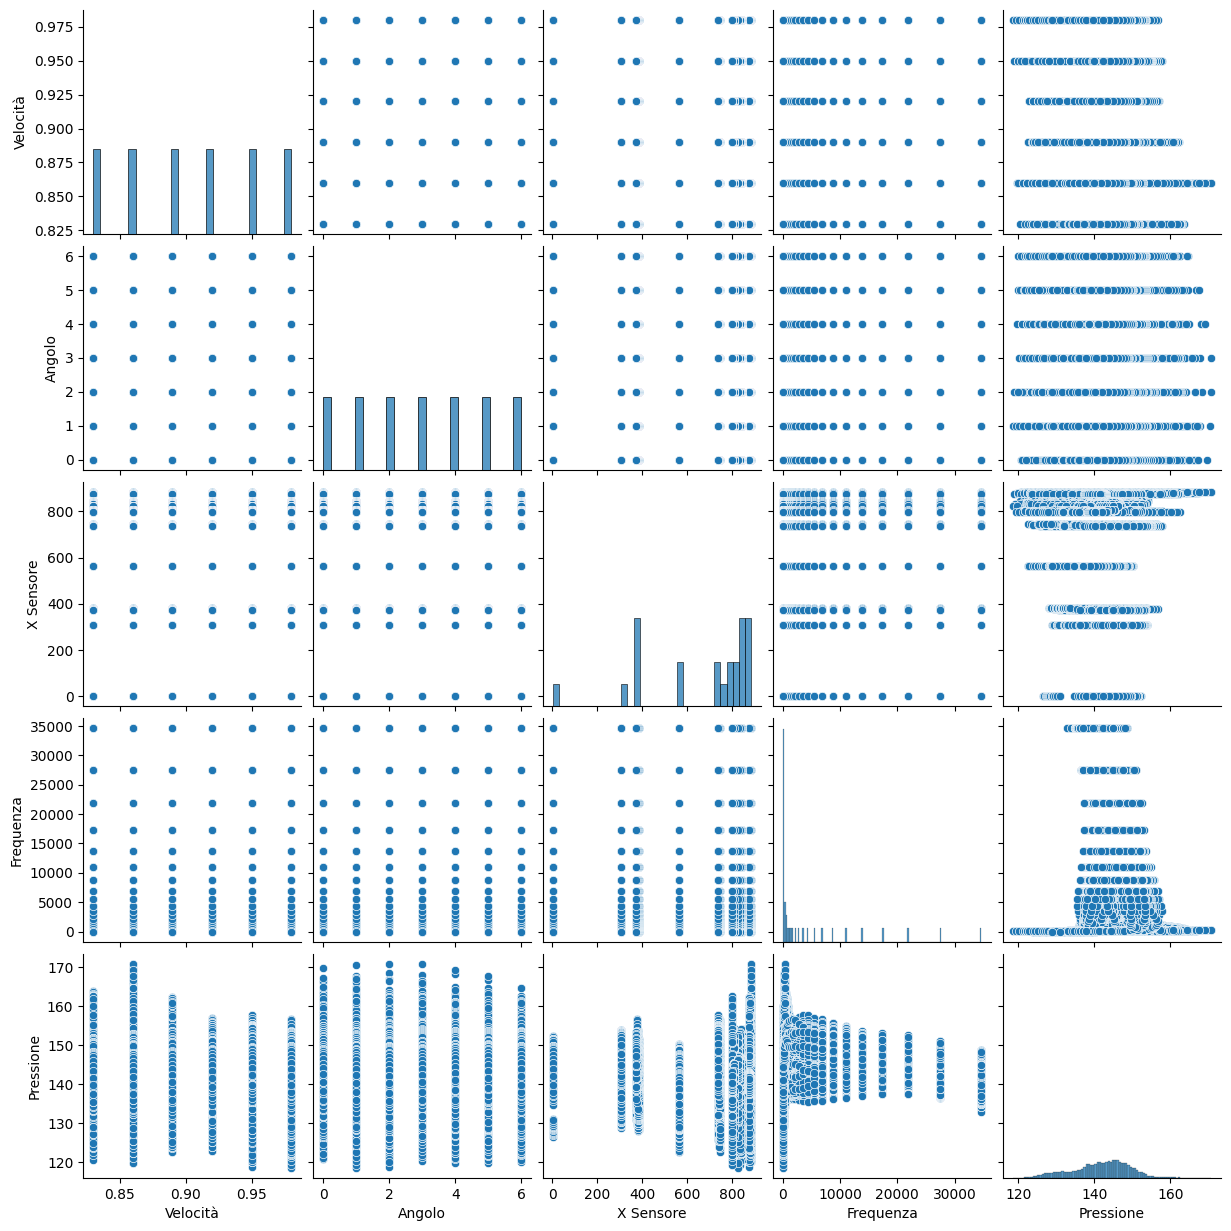

In [8]:
# Visualizza la matrice di dispersione delle features
sns.pairplot(ds)
plt.show()

In [9]:
ds.describe()

,Velocità,Angolo,X Sensore,Frequenza,Pressione
count,36708.000000,36708.000000,36708.000000,36708.000000,36708.000000
mean,0.905000,3.000000,664.130435,4433.456454,141.764016
std,0.051235,2.000027,239.417093,8123.653131,7.373487
min,0.830000,0.000000,3.000000,0.000000,118.589412
25%,0.860000,1.000000,383.000000,54.927190,137.346431
50%,0.905000,3.000000,797.000000,492.787039,142.620317
75%,0.950000,5.000000,841.000000,4363.021782,147.045070
max,0.980000,6.000000,884.000000,34656.713902,170.762698


    Velocità  Angolo  X Sensore     Frequenza   Pressione  \
0       0.83     0.0        884      8.705373  136.214930   
1       0.83     0.0        884     10.959415  137.277046   
2       0.83     0.0        884     13.797086  136.765639   
3       0.83     0.0        884     17.369503  136.208511   
4       0.83     0.0        884     21.866908  133.538084   
5       0.83     0.0        884     27.528806  134.703178   
6       0.83     0.0        884     34.656714  135.401108   
7       0.83     0.0        884     43.630218  138.327654   
8       0.83     0.0        884     54.927190  140.215260   
9       0.83     0.0        884     69.149235  142.239699   
10      0.83     0.0        884     87.053729  143.501253   
11      0.83     0.0        884    109.594152  145.060285   
12      0.83     0.0        884    137.970863  148.368775   
13      0.83     0.0        884    173.695026  149.734006   
14      0.83     0.0        884    218.669082  154.940605   
15      0.83     0.0    

<Axes: xlabel='Frequenza', ylabel='Pressione'>

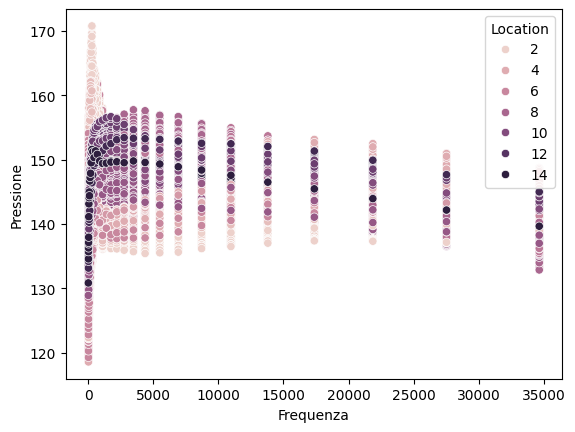

In [33]:
ds_filtered_fin = ml.FilterDataFrame(dsMappato2, ['X Sensore'], [[3]])
dsM_filtered=ml.dataFrame.FilterDataFrame(ds_filtered,['Variazioni_pressione'],[[0,1,2]])
print(dsM_filtered)
#plt.scatter(dsM_filtered['Frequenza'],dsM_filtered['Pressione'])
#sns.scatterplot(data=dsMappato2, x='Frequenza', y='Pressione', hue='Variazioni_pressione')
sns.scatterplot(data=dsMappato2, x='Frequenza', y='Pressione', hue='Location')

In [ ]:
print(dsMappato['Variazioni_pressione'].unique())

[0 1 2]


In [11]:
ds_filtered = ml.FilterDataFrame(dsMappato,['Variazioni_pressione'],[[1]])
Input, output = ml.utils.splitInputOutput(dsMappato2, ['Pressione'])
print("input",Input)
print("output",output)
ds_filtered.head(len(ds_filtered))

input        Velocità  Angolo  X Sensore     Frequenza  Variazioni_pressione  \
0          0.83     0.0        884      8.705373                     0   
1          0.83     0.0        884     10.959415                     0   
2          0.83     0.0        884     13.797086                     0   
3          0.83     0.0        884     17.369503                     0   
4          0.83     0.0        884     21.866908                     0   
...         ...     ...        ...           ...                   ...   
36703      0.98     6.0          3  17369.502567                     2   
36704      0.98     6.0          3  21866.908172                     2   
36705      0.98     6.0          3  27528.806375                     2   
36706      0.98     6.0          3  34656.713902                     2   
36707      0.98     6.0          3      0.000000                     0   

       Location  
0             2  
1             2  
2             2  
3             2  
4             2

,Velocità,Angolo,X Sensore,Frequenza,Pressione,Variazioni_pressione
16,0.83,0.0,884,346.567139,163.399034,1
17,0.83,0.0,884,436.302178,163.732287,1
18,0.83,0.0,884,549.271899,162.983821,1
19,0.83,0.0,884,691.492352,162.005594,1
20,0.83,0.0,884,870.537294,159.804457,1
...,...,...,...,...,...,...
36693,0.98,6.0,3,1736.950257,149.619267,1
36694,0.98,6.0,3,2186.690817,149.670522,1
36695,0.98,6.0,3,2752.880637,149.522557,1
36696,0.98,6.0,3,3465.671390,149.795296,1


In [54]:
X_train, X_test, y_train, y_test = train_test_split(Input, output, test_size=0.2, random_state=42)

scalers = {
    'NoneScaler': ml.NoneScaler(),
    'Normalizer': Normalizer(),
    'QuantileTransformer': QuantileTransformer(),
    'PowerTransformer': PowerTransformer(),
    'MaxAbsScaler': MaxAbsScaler(),
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler()
}
scaler = scalers['QuantileTransformer']
inputScaled = scaler.fit_transform(Input)
pca = PCA(n_components=2)
input_pca = pca.fit_transform(inputScaled)
#make collumns trasformer

In [55]:
import pandas as pd
print("input",input_pca)
pd.DataFrame(input_pca).head(len(input_pca))

input [[-0.61480802 -0.70543173]
 [-0.59975953 -0.70543173]
 [-0.58471103 -0.70543173]
 ...
 [ 0.73312914  0.70877548]
 [ 0.75470811  0.70877548]
 [-0.63610306  0.70877548]]


,0,1
0,-0.614808,-0.705432
1,-0.599760,-0.705432
2,-0.584711,-0.705432
3,-0.569946,-0.705432
4,-0.554330,-0.705432
...,...,...
36703,0.703032,0.708775
36704,0.718081,0.708775
36705,0.733129,0.708775
36706,0.754708,0.708775


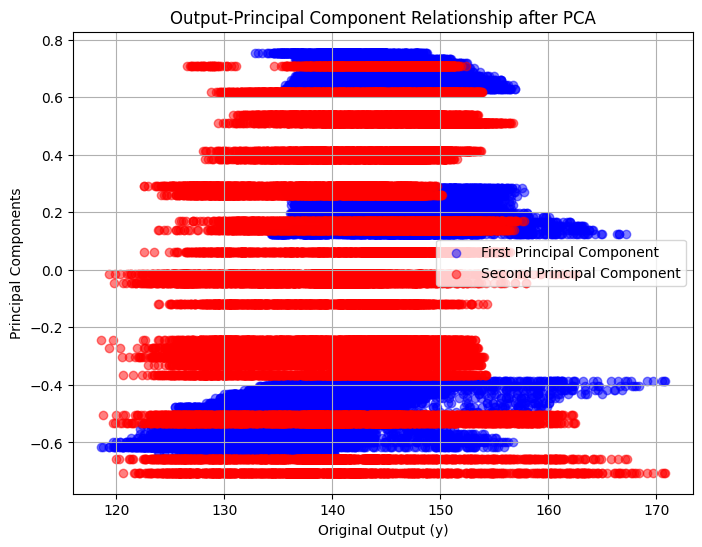

In [56]:
# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(output, input_pca[:, 0], color='blue', alpha=0.5, label='First Principal Component')
plt.scatter(output, input_pca[:, 1], color='red', alpha=0.5, label='Second Principal Component')
plt.xlabel('Original Output (y)')
plt.ylabel('Principal Components')
plt.title('Output-Principal Component Relationship after PCA')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
# Definizione del trasformatore per le colonne 'Angolo', 'Frequenza' e 'Pressione'

mAndM=MinMaxScaler()
ncMm=[1]
std=StandardScaler()
ncStd=[3]
# Definizione dei trasformatori per le colonne
transformers = [
    ('MinMaxScaler', mAndM, ncMm),
    ('StandardScaler', std, ncStd)
    
]
preprocessor = ColumnTransformer(transformers=transformers,remainder='passthrough')
#Input, output = ml.utils.splitInputOutput(ds, ['Pressione'])
# Applichiamo le trasformazioni al DataFrame
#preprocessor.fit(Input)
#Input = preprocessor.transform(Input)


X_train, X_test, y_train, y_test = train_test_split(input_pca, output, test_size=0.2, random_state=42)


In [58]:
# Normalizzazione dei dati
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert continuous target variable to discrete classes
stopper=EarlyStopping(monitor='val_loss',patience=10,mode='min',restore_best_weights=True)
def get_log(root="../json/RetiNeuraliResult/Logs"):
    return Path(root) / strftime("run %Y-%m-%d %H-%M-%S")
run_log=get_log()
tensorboard=tf.keras.callbacks.TensorBoard(run_log,profile_batch=(100,200))

In [59]:
# Modello

model=models.Sequential()
model.add(layers.Dense(4,activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32,activation='elu'))
model.add(layers.Dense(32,activation='elu'))
model.add(layers.Dense(32,activation='elu'))
model.add(layers.Dense(1,activation='linear'))
model.summary()

model.compile(optimizer='RMSprop',loss='mse',metrics=['mae'])


c:\Users\oligi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,317 (9.05 KB)

 Trainable params: 2,317 (9.05 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:

dati=ml.read_json_file(ml.pathRNL)
epoche=dati['epochs']
numero_batch=dati['batch_size']
# Addestramento del modello
history=model.fit(X_train, y_train, epochs=epoche, batch_size=numero_batch,callbacks=[stopper,tensorboard],validation_data=(X_test,y_test))
if len(history.history['loss'])==epoche:
    dati['epochs']=epoche*2
    ml.write_json_file(ml.pathRNL,dati)

Epoch 1/400
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4187.0088 - mae: 38.6118 - val_loss: 34.7742 - val_mae: 4.5155
Epoch 2/400
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 34.6982 - mae: 4.4603 - val_loss: 38.1787 - val_mae: 4.9762
Epoch 3/400
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 28.3174 - mae: 4.0229 - val_loss: 34.6613 - val_mae: 4.7073
Epoch 4/400
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 28.0786 - mae: 3.9946 - val_loss: 34.5147 - val_mae: 4.3728
Epoch 5/400
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 28.3047 - mae: 4.0183 - val_loss: 25.5801 - val_mae: 3.7587
Epoch 6/400
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 27.9421 - mae: 3.9741 - val_loss: 25.8937 - val_mae: 3.8362
Epoch 7/400
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 27.5467 - mae: 3.9297 - val_loss: 33.2351 - val_mae: 4.2552
Epoch 8/400
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 27.3628 - mae: 3.9412 - val_loss: 27.4700 - val_mae: 4.0380
Epoch 9/400
1

In [61]:
%load_ext tensorboard
print(run_log)
%tensorboard --logdir=../json/RetiNeuraliResult/Logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
..\json\RetiNeuraliResult\Logs\run 2024-05-22 22-45-16


Reusing TensorBoard on port 6006 (pid 18552), started 20 days, 10:16:38 ago. (Use '!kill 18552' to kill it.)

In [62]:
#score = model.score(X_test, y_test)
#print("R^2", score)
y_test_predic=model.predict(X_test)
y_train_predic=model.predict(X_train)
#mse=mean_squared_error(y_test,y_predic)

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
918/918 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [63]:
dati=ml.read_json_file(ml.pathRNL)
Nmodello=dati['NumeroModelli']
dati['NumeroModelli']=Nmodello+1
posizione="../json/RetiNeuraliResult"
posizione=posizione+fr"/Modello{Nmodello}"
p=Path(posizione)
p.mkdir(parents=True,exist_ok=True)
m=ml.json_utils.modelTojson(model)
statistics=ml.utils.allStatistic(y_train,y_train_predic,y_test,y_test_predic)
plot_model(model,show_shapes=True,show_layer_names=False,show_layer_activations=True,to_file=Path(posizione+r"\StrutturaRete.png"))
infoRete={
    'statistiche': statistics,
    'modello': m,
    'normalizzazione':scaler.__class__.__name__
    #'ottimizzatore':model.optimizer.get_config(),
}
ml.json_utils.write_json_file(posizione+r"\Modello.json",infoRete)
model.save(posizione+r"\ModelloAdestrato.h5")
dati['Modelli'].append({f"posizione Modello{Nmodello}":posizione})
ml.json_utils.write_json_file(ml.pathRNL,dati)

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


805
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


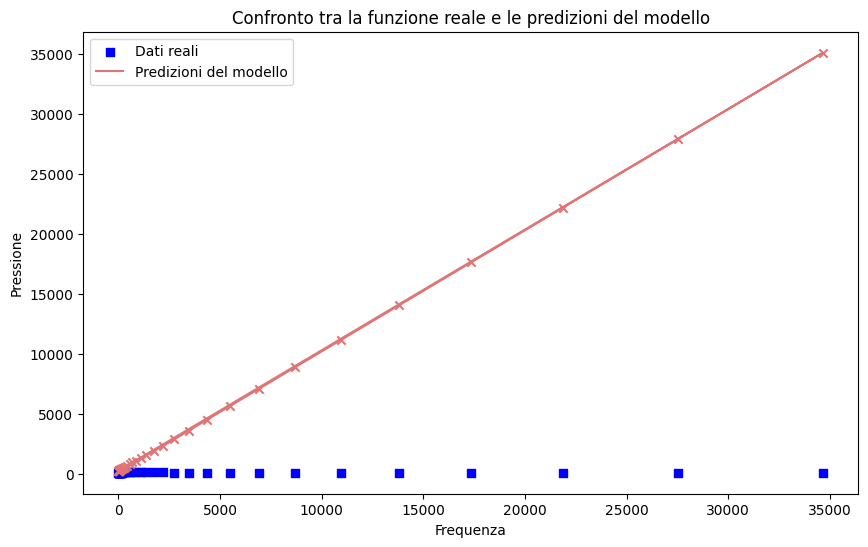

(38, 1)
(38,)


In [64]:
posX=random.choice(dsMappato2['X Sensore'].to_list())
print(posX)
ds_filtered = ml.FilterDataFrame(dsMappato2, ['X Sensore', 'Velocità', 'Angolo'], [[884], [0.83], [0.0]])
Input2, Output = ml.utils.splitInputOutput(ds_filtered, ['Pressione'])
#Input2=preprocessor.transform(Input2)
#Input2 = scaler.transform(Input)
Input2 = pca.transform(Input2)
predictions = model.predict(Input2)
# Plottaggio dei risultati
ml.plot_utils.plotAndamentoPlot(predictions,Output,ds_filtered['Frequenza'],posizione+r"\PlotAndamento.png")

new=np.unique(predictions)
print(predictions.shape)
print(new.shape)

  49/1148 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


1148/1148 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


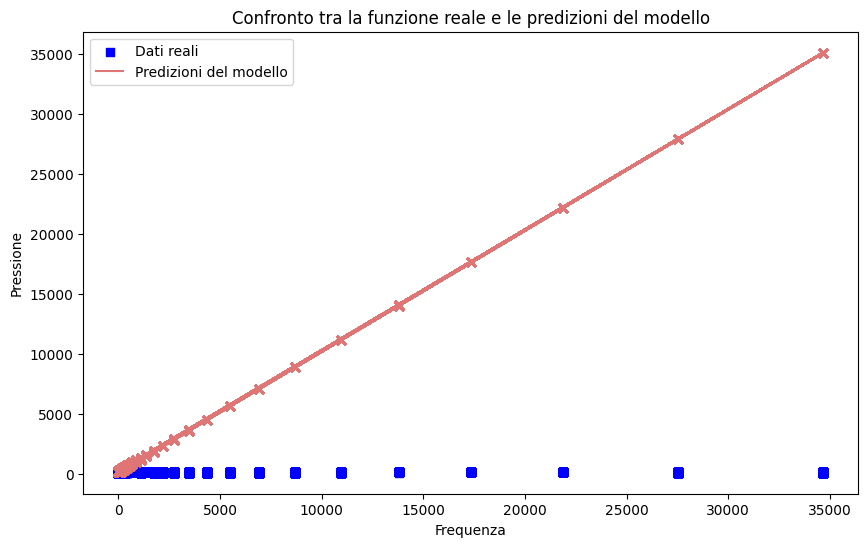

In [65]:
Input3, Output = ml.utils.splitInputOutput(dsMappato2, ['Pressione'])
Input3=pca.transform(Input3)
predictions = model.predict(Input3)
ml.plot_utils.plotAndamentoPlot(predictions,Output,dsMappato2['Frequenza'])

..\json\RetiNeuraliResult\Modello0
{'class_name': 'Sequential', 'config': {'name': 'sequential_2', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_6_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_6', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 64, 'activation': 'swish', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'keras.la

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


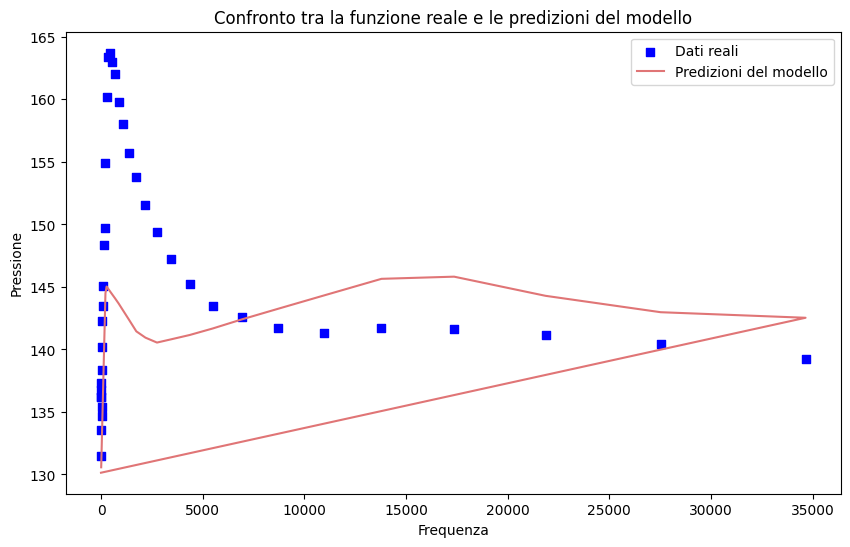




..\json\RetiNeuraliResult\Modello1
{'class_name': 'Sequential', 'config': {'name': 'sequential', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'keras.layer

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


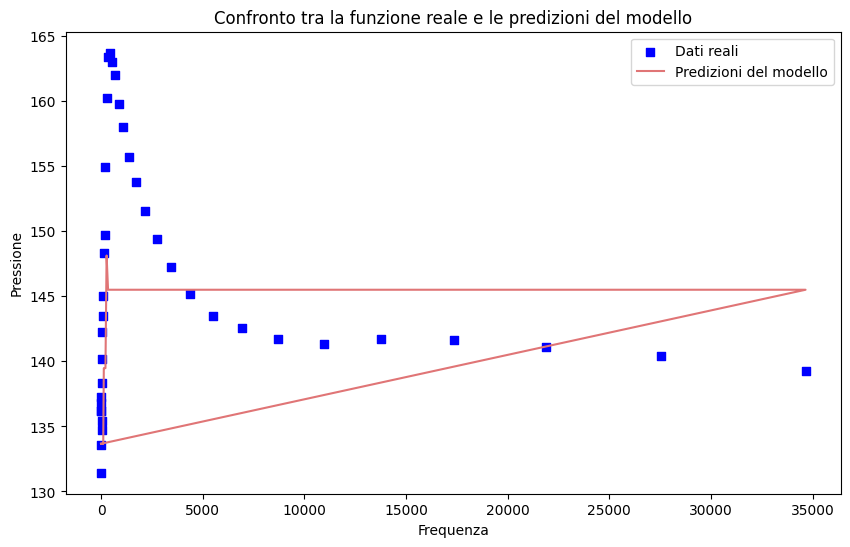




..\json\RetiNeuraliResult\Modello2
{'class_name': 'Sequential', 'config': {'name': 'sequential', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'keras.layer

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 24ms/step


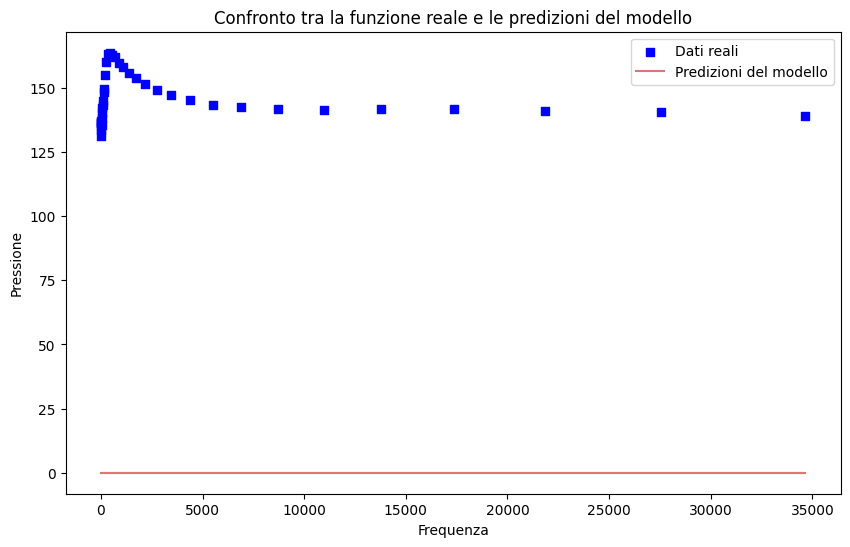




..\json\RetiNeuraliResult\Modello3
{'class_name': 'Sequential', 'config': {'name': 'sequential_3', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_9_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_9', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'keras

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


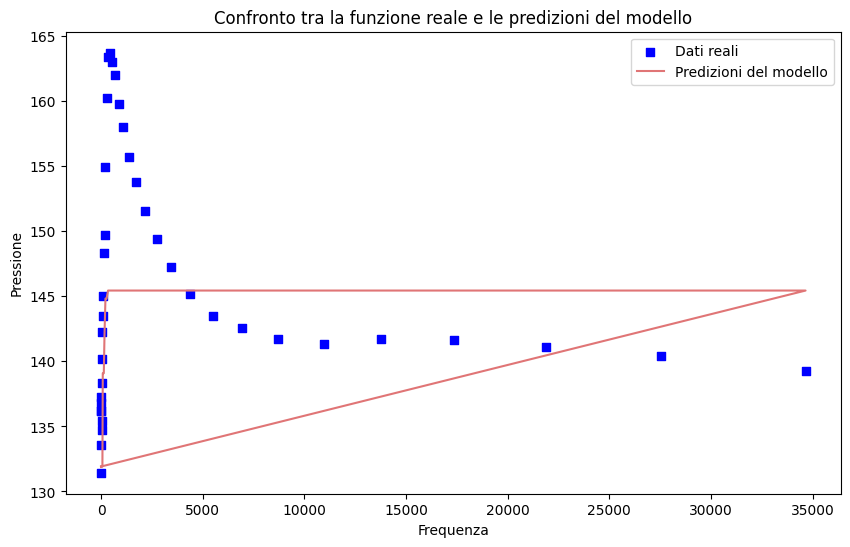




..\json\RetiNeuraliResult\Modello4
{'class_name': 'Sequential', 'config': {'name': 'sequential_8', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_25_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_25', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 4, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'keras

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


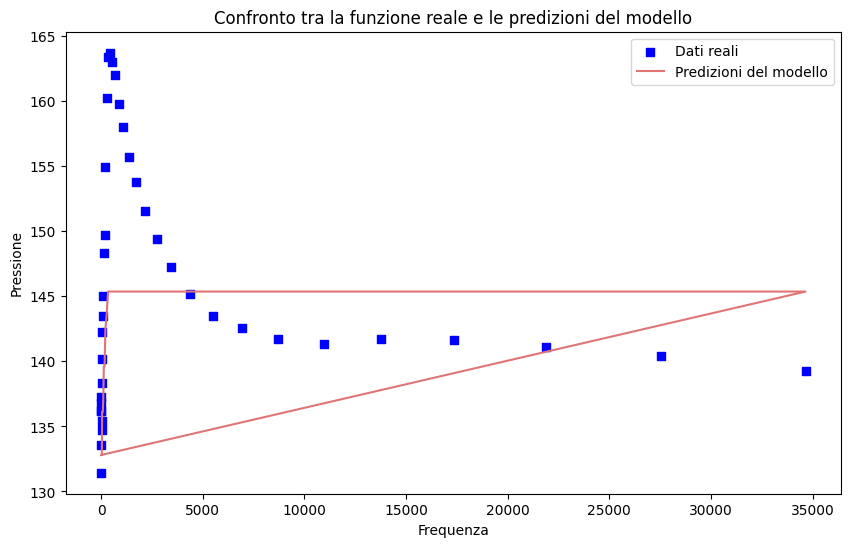




..\json\RetiNeuraliResult\Modello5
{'class_name': 'Sequential', 'config': {'name': 'sequential_9', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_28_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_28', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 4, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'keras

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


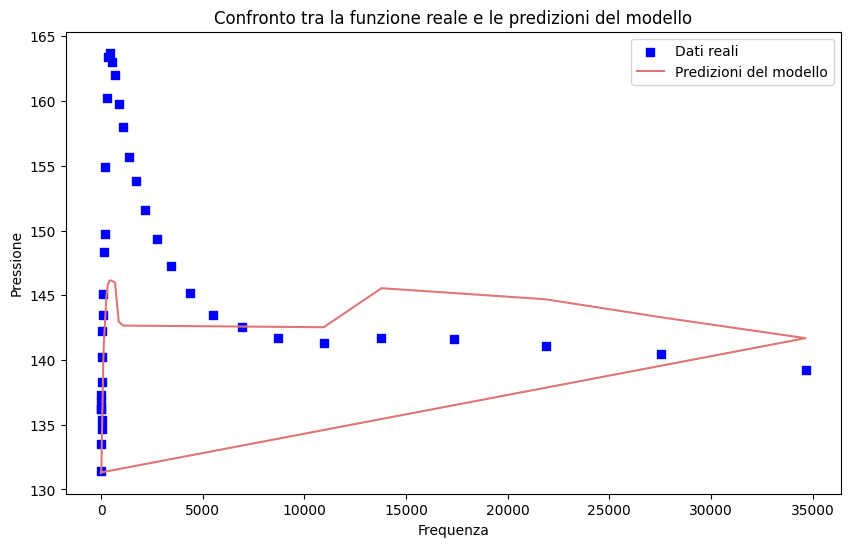




..\json\RetiNeuraliResult\Modello6
{'class_name': 'Sequential', 'config': {'name': 'sequential_10', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_33_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_33', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 4, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'kera

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


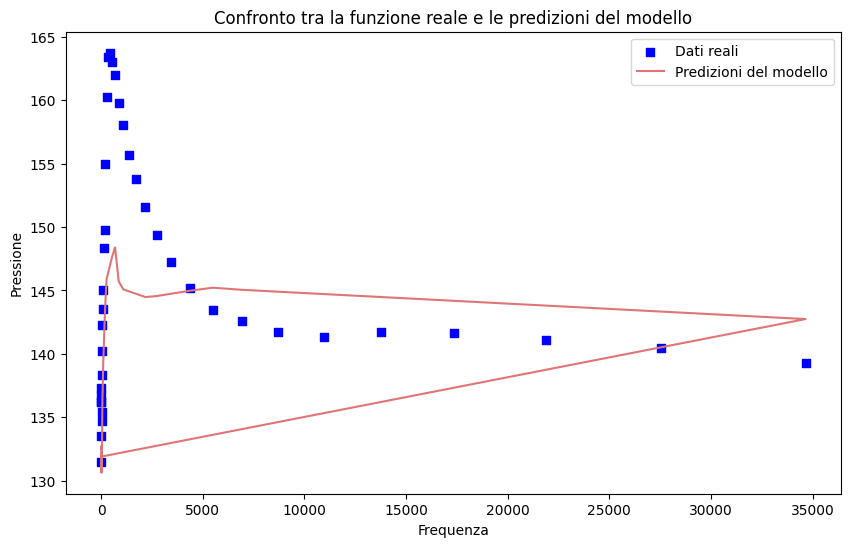




..\json\RetiNeuraliResult\Modello7
{'class_name': 'Sequential', 'config': {'name': 'sequential_11', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_37_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_37', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 4, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'kera

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


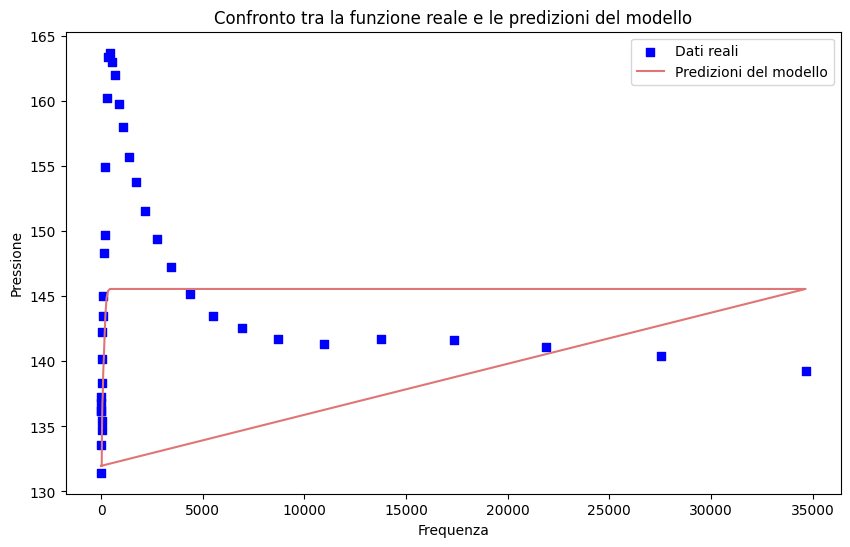




..\json\RetiNeuraliResult\Modello8
{'class_name': 'Sequential', 'config': {'name': 'sequential_12', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_41_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_41', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 4, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'ke

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 4ms/step


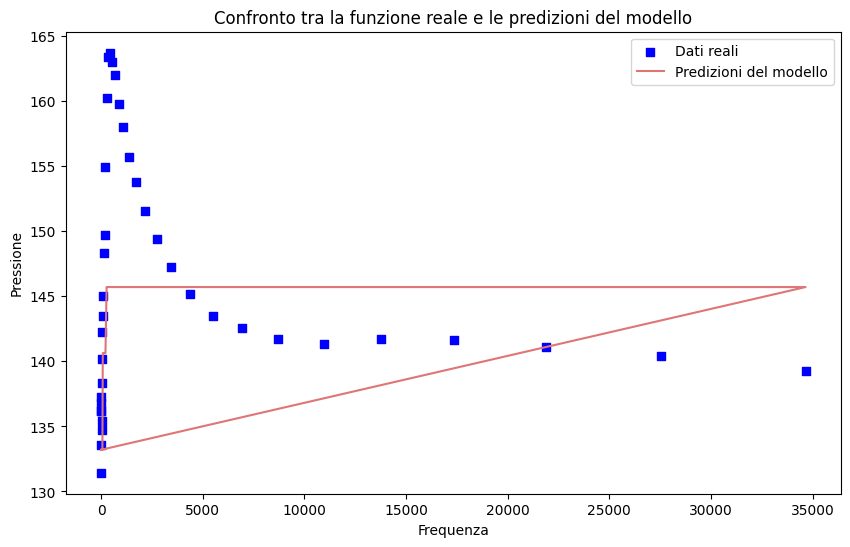




..\json\RetiNeuraliResult\Modello9
{'class_name': 'Sequential', 'config': {'name': 'sequential_12', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_41_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_41', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 4, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'ke

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


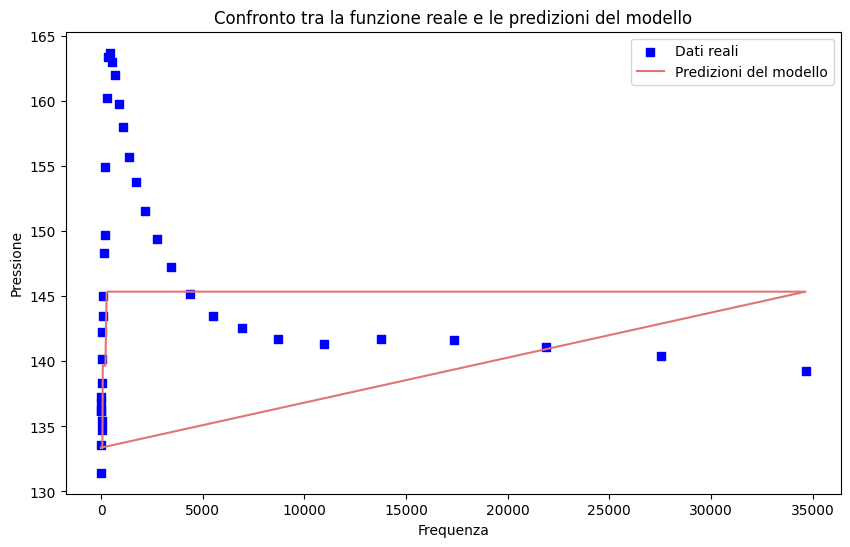




..\json\RetiNeuraliResult\Modello10
{'class_name': 'Sequential', 'config': {'name': 'sequential', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 4, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'keras.laye

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


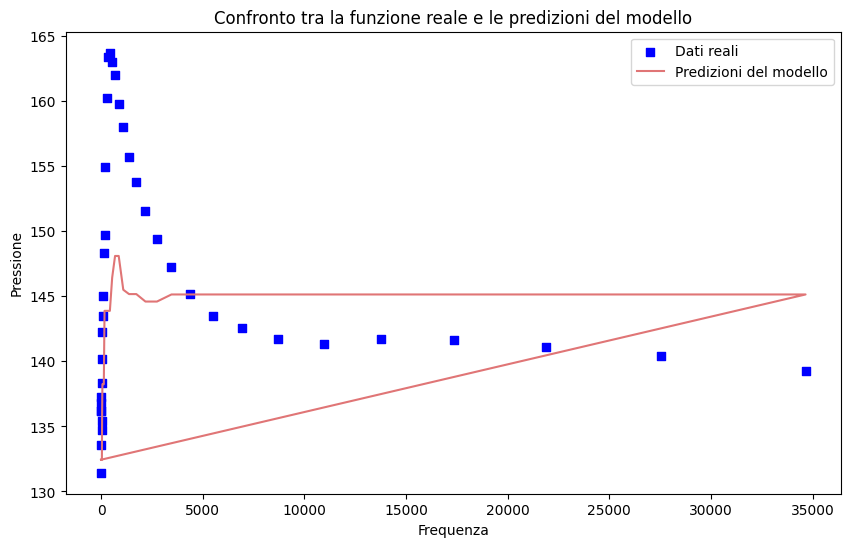




..\json\RetiNeuraliResult\Modello11
{'class_name': 'Sequential', 'config': {'name': 'sequential_1', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_3_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_3', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 4, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'kera

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


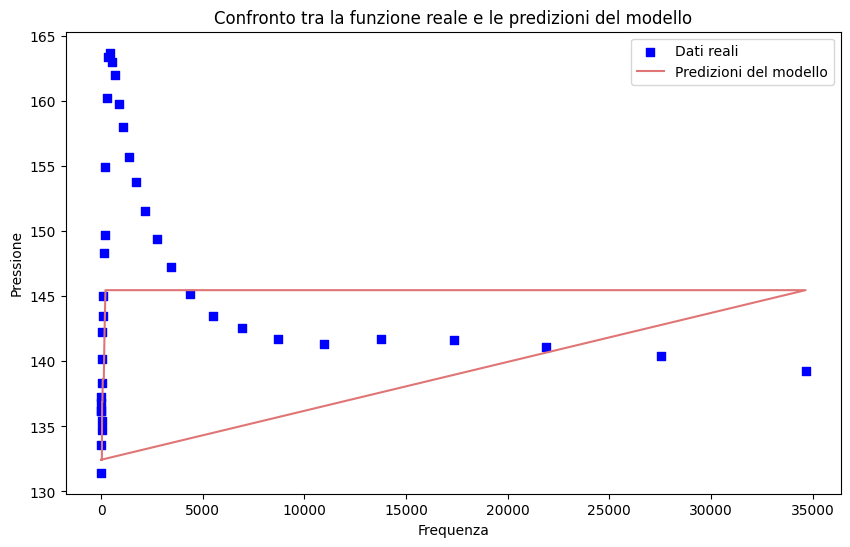




..\json\RetiNeuraliResult\Modello12
{'class_name': 'Sequential', 'config': {'name': 'sequential_2', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 4], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_7_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_7', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 4], 'units': 4, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 4]}}, {'module': 'kera

C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


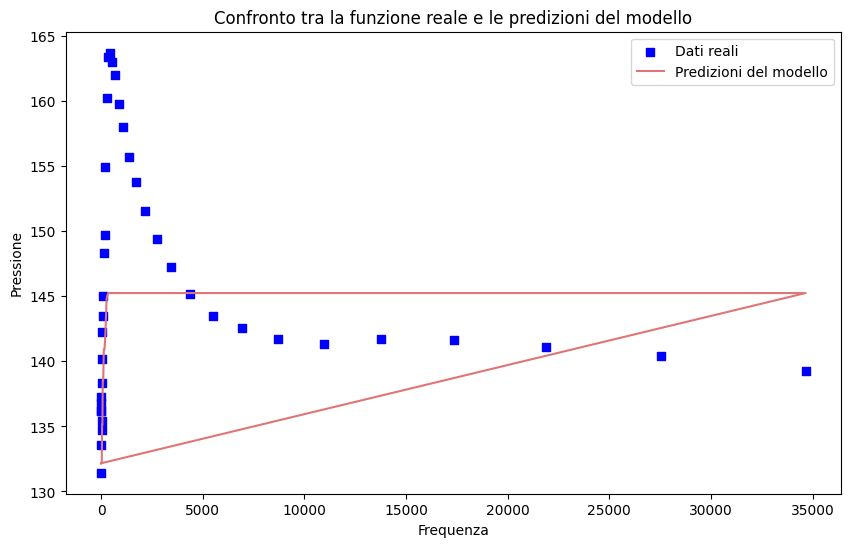

In [ ]:
from tensorflow.keras.models import model_from_config
dati=ml.read_json_file(ml.pathRNL)
epochs=dati['epochs']
batch_size=dati['batch_size']
stopper=EarlyStopping(monitor='val_loss',patience=10,mode='min',restore_best_weights=True)
for i, modelloDato in enumerate(dati['Modelli']):
    posizione=r".\json\RetiNeuraliResult"
    posizione=posizione+fr"\Modello{i}"
    p=Path(posizione)
    p.mkdir(parents=True,exist_ok=True)
    print(posizione)
    modello=model_from_config(modelloDato['modello'])
    print(modelloDato['modello'])
    print(modelloDato['statistiche'])
    modello.summary()
    plot_model(modello,show_shapes=True,show_layer_names=False,show_layer_activations=True, to_file=posizione+r"\StrutturaRete.png")
    ml.json_utils.write_json_file(posizione+r"\Modello.json",modelloDato)
    modello.compile(optimizer='adam',loss='mse',metrics=['mae'])
    modello.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,callbacks=[stopper],validation_data=(X_test,y_test))
    modello.save(posizione+r"\ModelloAdestrato.h5")
    predictions = modello.predict(Input2)
    ml.plotAndamentoPlot(predictions,Output,path=posizione+r"\PlotAndamento.png")
    print("\n\n")

In [ ]:
dati=ml.read_json_file(ml.pathRNL)
for i, modelloDato in enumerate(dati['Modelli']):
    posizione="../json/RetiNeuraliResult"
    posizione=posizione+fr"/Modello{i}"
    dati['Modelli'][i]={f"posizione Modello{i}":posizione}

ml.json_utils.write_json_file(ml.pathRNL,dati)

In [ ]:
dati=ml.read_json_file(ml.pathRNL)
for i, modelloDato in enumerate(dati['Modelli']):
    path=Path(dati['Modelli'][i][f"posizione Modello{i}"])
    path=path / "ModelloAdestrato.h5"
    m=tf.keras.models.load_model(path)
    print(m.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4545 (17.75 KB)
Trainable params: 4545 (17.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                             

#Auto turinig Iper-parametri

In [ ]:
from tabnanny import verbose
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras import activations,optimizers

autoDf = ml.dataFrame.RenameColumns(ml.pathDataSet)
X, y = ml.utils.splitInputOutput(autoDf, ['Pressione'])
def create_model(optimizer='adam', activation='relu', neurons=64, num_layers=2):
    model = models.Sequential()
    model.add(layers.Dense(4, activation='relu', input_shape=(X.shape[1],)))
    for _ in range(num_layers):
        model.add(layers.Dense(neurons, activation=activation))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return model
supported_activations = [name for name in dir(activations) if callable(getattr(activations, name))]
supported_optimizers = [name for name in dir(optimizers) if callable(getattr(optimizers, name))]
blaklist=['deserialize', 'get', 'serialize']
supported_activations=[supported_activation for supported_activation in supported_activations if supported_activation not in blaklist]
print(len(supported_optimizers))
spitarray_activations=np.array_split(supported_activations, 5)
spitarray_optimizers=np.array_split(supported_optimizers, 4)
ottimi_optimizer=["SGD","RMSprop","Lion","Adam"]
ottimi_activation=["leaky_relu","relu","sigmoid","softplus","elu"]
param_grid = {
    'model__optimizer': ottimi_optimizer,  # Ottimizzatori da testare
    'model__neurons': [16,32,64],  # Numero di neuroni nei layer nascosti da testare
    'model__num_layers': [1, 2, 3],  # Numero di layer nascosti da testare
    'model__activation': ottimi_activation  # Funzioni di attivazione da testare
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

keras_model = KerasRegressor(build_fn=create_model, epochs=20, batch_size=16,verbose=3,callbacks=[EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)])

grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, verbose=10,n_jobs=-1,cv=3)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

y_test_predic = grid_search.predict(X_test)
y_train_predic = grid_search.predict(X_train)
statistics = ml.utils.allStatistic(y_train, y_train_predic, y_test, y_test_predic)
print("Mean Squared Error on test set: %.2f" % statistics['MSE_test'])
print("Mean Absolute Error on test set: %.2f" % statistics['MAE_test'])


16
Fitting 3 folds for each of 180 candidates, totalling 540 fits


C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/20


C:\Users\oligi\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [            nan -2.70993505e+00  2.85001173e-01 -1.64416880e+00
             nan -1.06249128e+00  4.81144684e-01 -2.15216454e+00
             nan -3.81533686e+00  3.21997771e-01  4.73435982e-01
             nan  2.26703398e-01  4.97238594e-01 -2.40333075e+00
             nan -2.78774549e+00  3.27409765e-01  5.07018869e-01
             nan  3.45060039e-01  3.40926793e-01  6.20056533e-02
             nan  4.66936092e-01  5.07607842e-01  2.03932082e-01
             nan  3.44562160e-01  2.60700646e-01  4.93501849e-01
             nan  4.79733872e-01  3.28329134e-01  4.99320906e-01
 -6.14588980e-04 -1.96915600e+00  4.51965211e-01 -4.67724317e-01
             nan -5.23066138e+00 -1.57588282e-02 -1.31056819e+00
             nan -1.57533653e-01  1.66580710e-01 -2.15901196e-01
 -2.04480619e-03  4.71466067e-01 -4.65146263e-01 -8.279483

Epoch 2/20


c:\Users\oligi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error
  current = self.get_monitor_value(logs)


Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Best: 0.559500 using {'model__activation': 'elu', 'model__neurons': 32, 'model__num_layers': 3, 'model__optimizer': 'RMSprop'}
nan (nan) with: {'model__activation': 'leaky_relu', 'model__neurons': 16, 'model__num_layers': 1, 'model__optimizer': 'SGD'}
-2.709935 (2.037051) with: {'model__activation': 'leaky_relu', 'model__neurons': 16, 'model__num_layers': 1, 'model__optimizer': 'RMSprop'}
0.285001 (0.208927) with: {'model__activation': 'leaky_relu', 'model__neurons': 16, 'model__num_layers': 1, 'model__optimizer': 'Lion'}
-1.644169 (1.569716) with: {'model__activation': 'leaky_relu', 'model__neurons': 16, 'model__num_layers': 1, 'model__optimizer': 'Adam'}
nan (nan) with: {'model__activation': 'leaky_relu', 'model__neurons': 16, 'model__num_layers': 2, 'model__optimizer': 'SGD'}
-

In [ ]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
data={
    'best_score':grid_result.best_score_,
    'best_params':grid_result.best_params_,
    'statistics':statistics
}
jdata=ml.json_utils.read_json_file(ml.pathRNL)
if 'GridSearchCV' not in jdata:
    jdata['GridSearchCV']=[]
jdata['GridSearchCV'].append(data)
print(data)
ml.json_utils.write_json_file(ml.pathRNL,jdata)

Best: 0.5595001742308465 using {'model__activation': 'elu', 'model__neurons': 32, 'model__num_layers': 3, 'model__optimizer': 'RMSprop'}
{'best_score': 0.5595001742308465, 'best_params': {'model__activation': 'elu', 'model__neurons': 32, 'model__num_layers': 3, 'model__optimizer': 'RMSprop'}, 'statistics': {'MAE_train': 3.6467530884636497, 'MSE_train': 24.920365481696674, 'RMSE_train': 4.992030196392713, 'MAPE_train': 0.025658582506206864, 'R2_train': 0.5400855712132125, 'Spearman_train': 0.7300965810025312, 'MAE_test': 3.6298982446231958, 'MSE_test': 24.2065576010945, 'RMSE_test': 4.920016016345323, 'MAPE_test': 0.02556548062527363, 'R2_test': 0.5605450185543726, 'Spearman_test': 0.7335664627151484}}
